In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.api import Holt
from statsmodels.tsa.api import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing

In [17]:
df = pd.read_csv(r"C:\Users\Administrator.DAI-PC2\Downloads\Shubham\Practical Machine Learning\ClassWork\Datasets\sales-of-shampoo-over-a-three-ye.csv")
y_train = df['Sales of shampoo over a three year period'][:-6]
y_test = df['Sales of shampoo over a three year period'][-6:]

In [18]:
#### NSA Moving avg

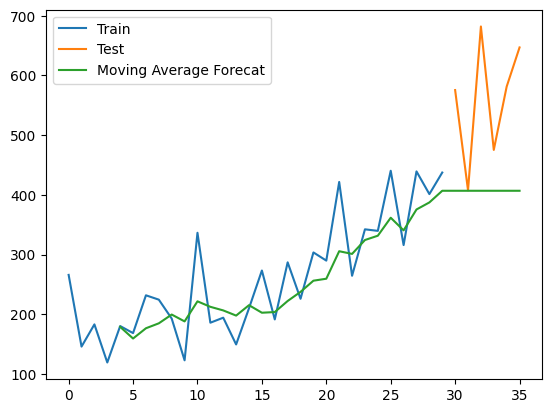

181.14200948427174


In [19]:
span = 5
fcast = y_train.rolling(span,center=False).mean()
MA = fcast.iloc[-1]
MA_Series = pd.Series(MA.repeat(len(y_test)))
MA_fcast = pd.concat([fcast,MA_Series],ignore_index=True)
plt.plot(y_train,label='Train')
plt.plot(y_test,label='Test')
plt.plot(MA_fcast,label='Moving Average Forecat')
plt.legend(loc = 'best')
plt.show()
rms= np.sqrt(mean_squared_error(y_test,MA_Series))

print(rms)

In [20]:
###### SES 

C:\Users\Administrator.DAI-PC2\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


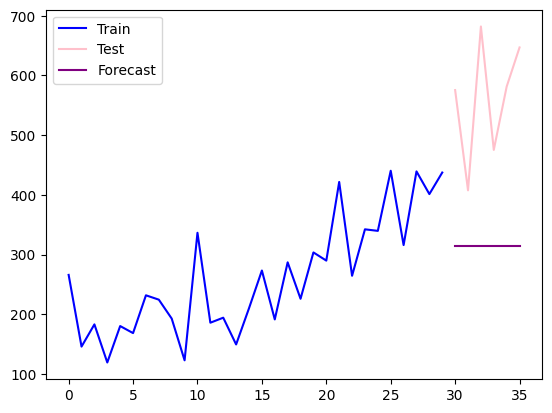

RMSE =  265.08400409209156


In [21]:
alpha = 0.08
ses = SimpleExpSmoothing(y_train)
fit1= ses.fit(smoothing_level=alpha)
fcast1 = fit1.forecast(len(y_test))

y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
plt.legend(loc = 'best')
plt.show()
print("RMSE = ",np.sqrt(mean_squared_error(y_test,fcast1)))

In [22]:
####### Holt linear trend method

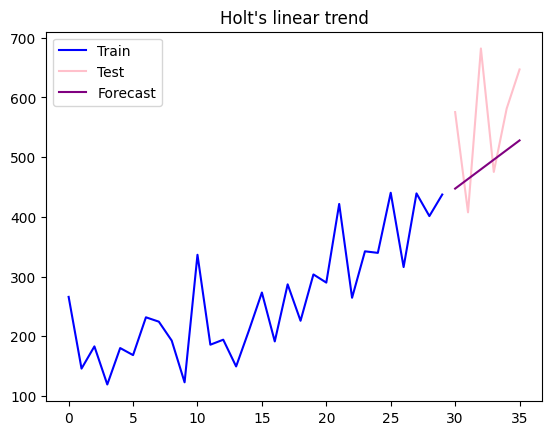

RMSE =  115.3760588470474


In [23]:
holt = Holt(y_train)
fit1= holt.fit()
fcast1 = fit1.forecast(len(y_test))

y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
plt.title("Holt's linear trend")
plt.legend(loc = 'best')
plt.show()
print("RMSE = ",np.sqrt(mean_squared_error(y_test,fcast1)))

In [24]:
####### Holt Exponential trend method

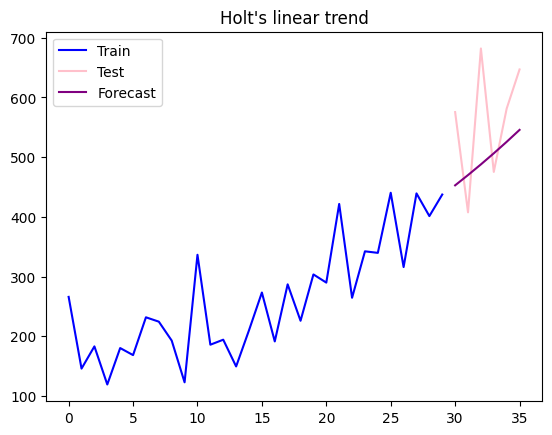

RMSE =  108.73790061450525


In [25]:
alpha = 0.5
beta = 0.2
holt = Holt(y_train, exponential =True)
#fit1= holt.fit(smoothing_level=alpha,smoothing_trend=beta)
fit1= holt.fit() # Auto tune to reduce train error can lead to overfitting
fcast1 = fit1.forecast(len(y_test))

y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
plt.title("Holt's linear trend")
plt.legend(loc = 'best')
plt.show()
print("RMSE = ",np.sqrt(mean_squared_error(y_test,fcast1)))

In [26]:
###### HW Additive

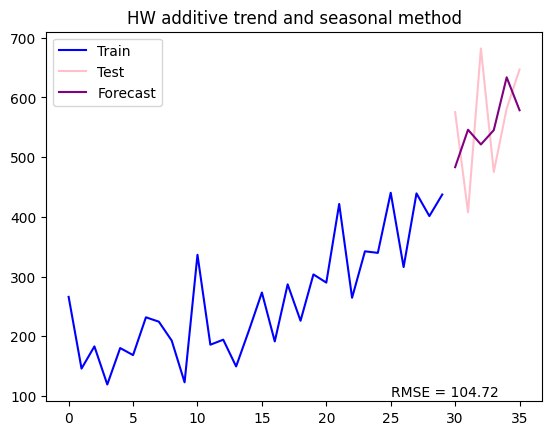

In [135]:
alpha = 0.25
beta = 0.21
gamma=0.01
hw_add= ExponentialSmoothing(y_train, seasonal_periods=12, trend='add',seasonal='add',use_boxcox=0.45)
fit1= hw_add.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)
#fit1= hw_add.fit()
fcast1 = fit1.forecast(len(y_test))

y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
error = round(sqrt(mean_squared_error(y_test,fcast1)),2)
plt.text(25,100,"RMSE = "+str(error))
plt.title("HW additive trend and seasonal method")
plt.legend(loc = 'best')
plt.show()

In [82]:
### HW Multiplicative

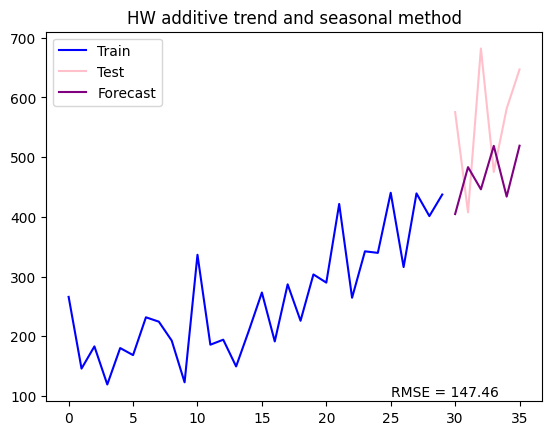

In [131]:
alpha = 0.0988
beta = 0.99
gamma=0.34
hw_add= ExponentialSmoothing(y_train, seasonal_periods=4, trend='add',seasonal='mul',use_boxcox=0.)
fit1= hw_add.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)
#fit1= hw_add.fit()
fcast1 = fit1.forecast(len(y_test))

y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
error = round(sqrt(mean_squared_error(y_test,fcast1)),2)
plt.text(25,100,"RMSE = "+str(error))
plt.title("HW additive trend and seasonal method")
plt.legend(loc = 'best')
plt.show()

In [73]:
fit1.params

{'smoothing_level': 0.24009649108891476,
 'smoothing_trend': 0.21185352055136975,
 'smoothing_seasonal': 0.07135292341628077,
 'damping_trend': nan,
 'initial_level': 127.74791680313878,
 'initial_trend': -2.6102554604877075,
 'initial_seasons': array([1.58740513, 1.56243844, 1.2627197 , 1.58672582, 1.36618156,
        1.50197089, 1.44525677, 1.71043679, 1.49425486, 1.82184163,
        1.57111835, 1.48581673]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [18]:
##### HW additive with damped

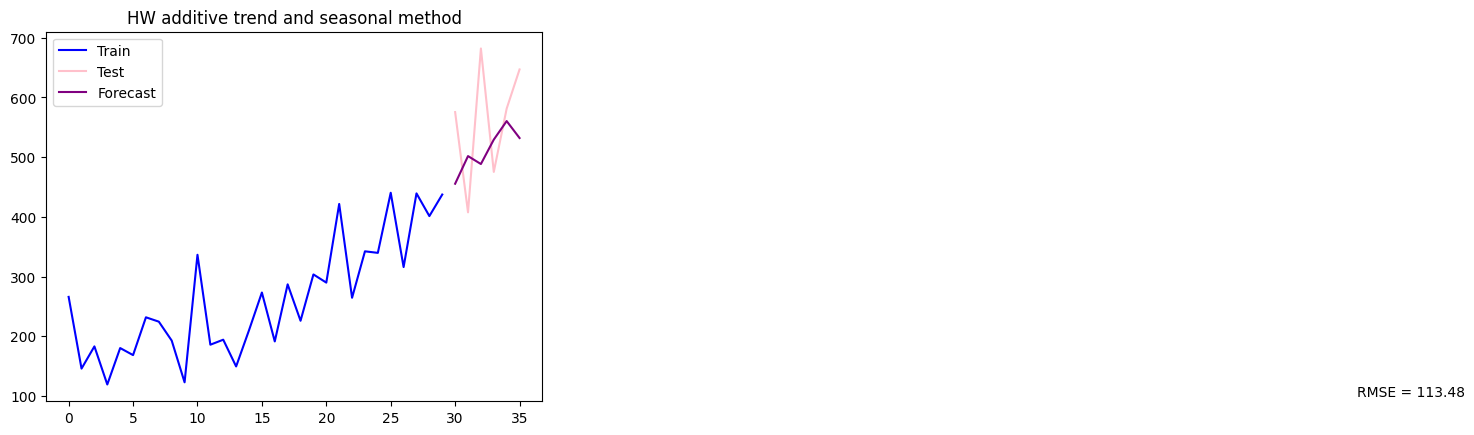

In [32]:
alpha = 0.1
beta = 0.98
gamma=0.3
phi=0.99
hw_add= ExponentialSmoothing(y_train, seasonal_periods=12, trend='add',seasonal='add',damped_trend=True)
#fit1= hw_add.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma,damping_trend=phi)
fit1= hw_add.fit()
fcast1 = fit1.forecast(len(y_test))

y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
error = round(sqrt(mean_squared_error(y_test,fcast1)),2)
plt.text(100,100,"RMSE = "+str(error))
plt.title("HW additive trend and seasonal method")
plt.legend(loc = 'best')
plt.show()

In [20]:
##### HW multiplicative with damped

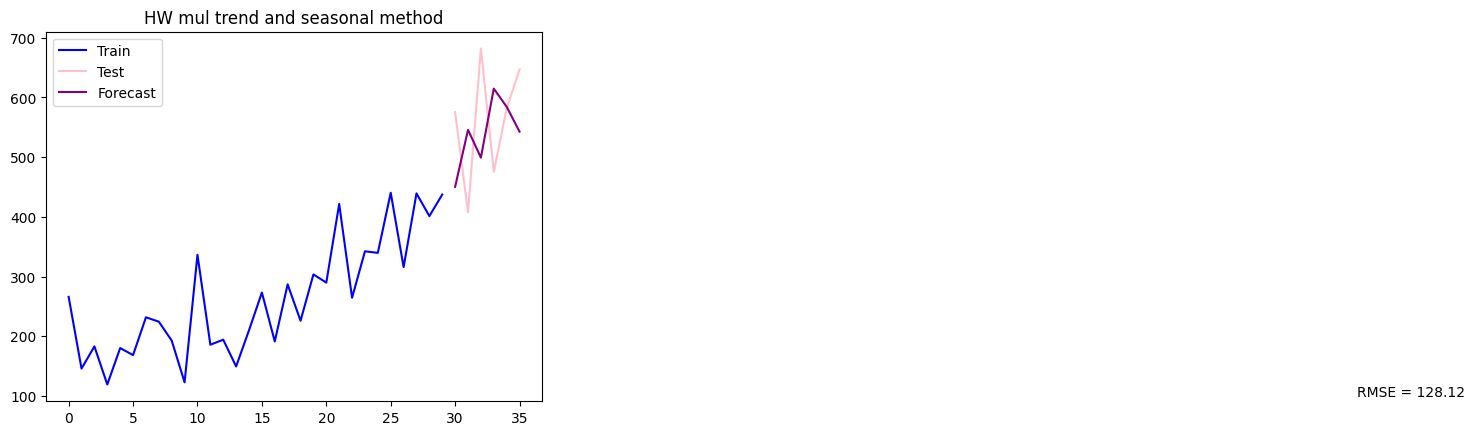

In [33]:
alpha = 0.0988
beta = 0.99
gamma=0.34
phi=0.99
hw_add= ExponentialSmoothing(y_train, seasonal_periods=12, trend='add',seasonal='mul',damped_trend=True)
#fit1= hw_add.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma,damping_trend=phi)
fit1= hw_add.fit()
fcast1 = fit1.forecast(len(y_test))

y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
error = round(sqrt(mean_squared_error(y_test,fcast1)),2)
plt.text(100,100,"RMSE = "+str(error))
plt.title("HW mul trend and seasonal method")
plt.legend(loc = 'best')
plt.show()

In [ ]:
########## Change data to quarterly

Text(0.5, 1.0, 'Monthly shampoo sales')

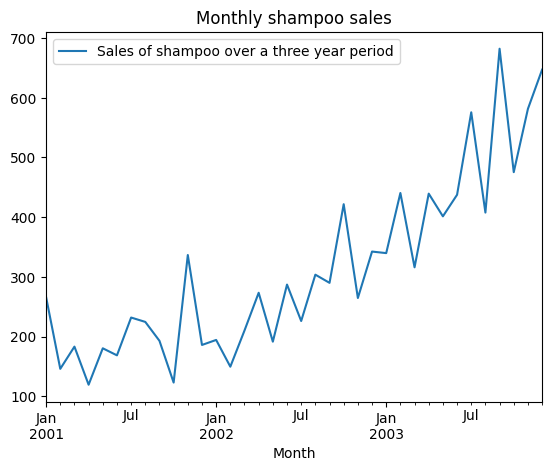

In [150]:
df = pd.read_csv(r"C:\Users\Administrator.DAI-PC2\Downloads\Shubham\Practical Machine Learning\ClassWork\Datasets\sales-of-shampoo-over-a-three-ye.csv",index_col=0)
df.index= pd.to_datetime(df.index).to_period("M")

df.plot()
plt.title("Monthly shampoo sales")

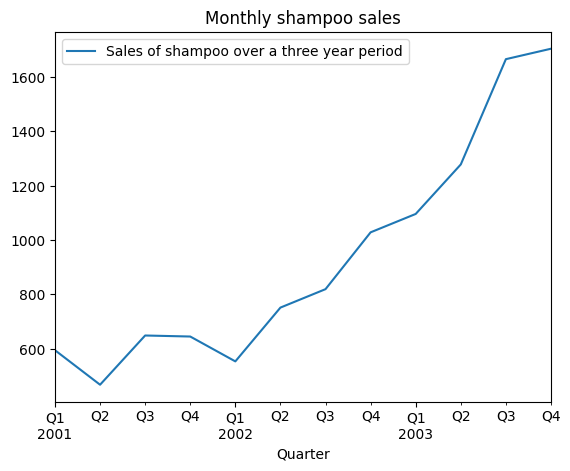

In [151]:
df_quar = df.resample("Q").sum()
df_quar.index.rename('Quarter',inplace=True)

df_quar.plot()
plt.title("Monthly shampoo sales")
plt.xlabel('Quarter')
plt.show()

In [155]:
df_quar.reset_index(inplace=True)
y_train = df_quar['Sales of shampoo over a three year period'][:-3]
y_test = df_quar['Sales of shampoo over a three year period'][-3:]

In [156]:
y_train

0     595.0
1     468.1
2     649.1
3     645.3
4     553.9
5     751.7
6     819.5
7    1028.4
8    1096.0
Name: Sales of shampoo over a three year period, dtype: float64

In [157]:
#### Rolling Avg

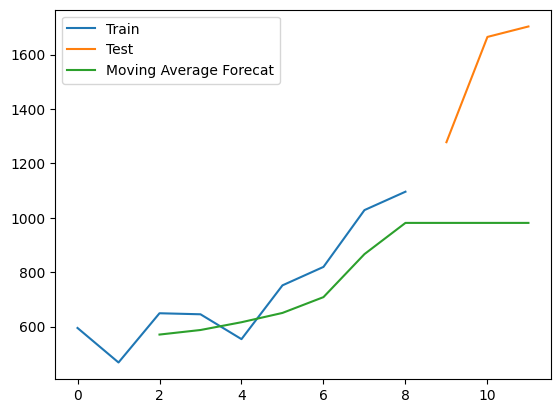

599.2178707837965


In [162]:
span = 3
fcast = y_train.rolling(span,center=False).mean()
MA = fcast.iloc[-1]
MA_Series = pd.Series(MA.repeat(len(y_test)))
MA_fcast = pd.concat([fcast,MA_Series],ignore_index=True)
plt.plot(y_train,label='Train')
plt.plot(y_test,label='Test')
plt.plot(MA_fcast,label='Moving Average Forecat')
plt.legend(loc = 'best')
plt.show()
rms= np.sqrt(mean_squared_error(y_test,MA_Series))

print(rms)

In [163]:
###### SES 

C:\Users\Administrator.DAI-PC2\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


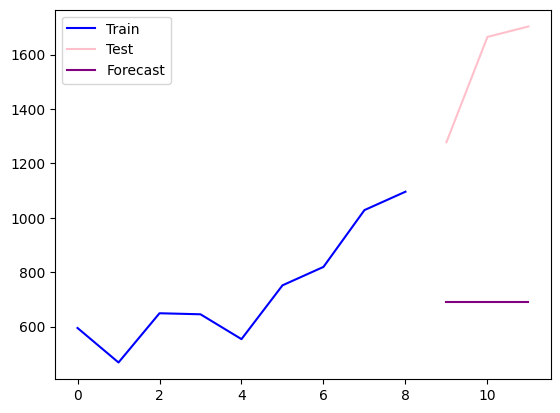

RMSE =  880.8852328197133


In [164]:
alpha = 0.08
ses = SimpleExpSmoothing(y_train)
fit1= ses.fit(smoothing_level=alpha)
fcast1 = fit1.forecast(len(y_test))

y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
plt.legend(loc = 'best')
plt.show()
print("RMSE = ",np.sqrt(mean_squared_error(y_test,fcast1)))

In [22]:
####### Holt linear trend method

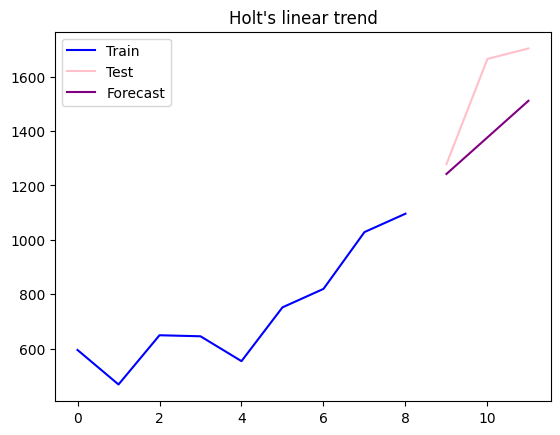

RMSE =  201.30262623583795


In [165]:
holt = Holt(y_train)
fit1= holt.fit()
fcast1 = fit1.forecast(len(y_test))

y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
plt.title("Holt's linear trend")
plt.legend(loc = 'best')
plt.show()
print("RMSE = ",np.sqrt(mean_squared_error(y_test,fcast1)))

In [24]:
####### Holt Exponential trend method

C:\Users\Administrator.DAI-PC2\anaconda3\Lib\site-packages\pandas\util\_decorators.py:213: EstimationWarning: Model has no free parameters to estimate. Set optimized=False to suppress this warning
  return func(*args, **kwargs)


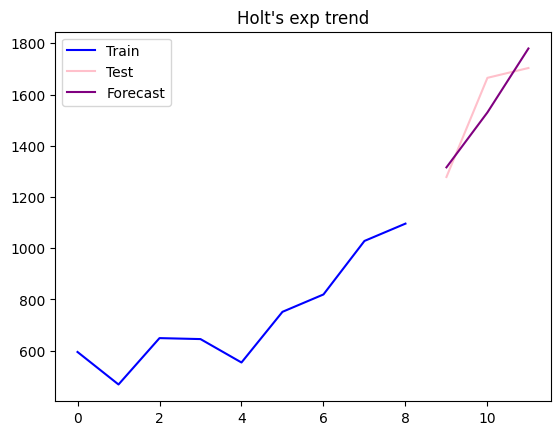

RMSE =  92.06758449574966


In [212]:
alpha = 0.6
beta = 0.8
holt = Holt(y_train, exponential =True)
fit1= holt.fit(smoothing_level=alpha,smoothing_trend=beta)
#fit1= holt.fit() # Auto tune to reduce train error can lead to overfitting
fcast1 = fit1.forecast(len(y_test))

y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
plt.title("Holt's exp trend")
plt.legend(loc = 'best')
plt.show()
print("RMSE = ",np.sqrt(mean_squared_error(y_test,fcast1)))

In [188]:
fit1.params

{'smoothing_level': 0.6060096378962277,
 'smoothing_trend': 0.6060094498781271,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 595.0,
 'initial_trend': 0.7867226890756303,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [26]:
###### HW Additive

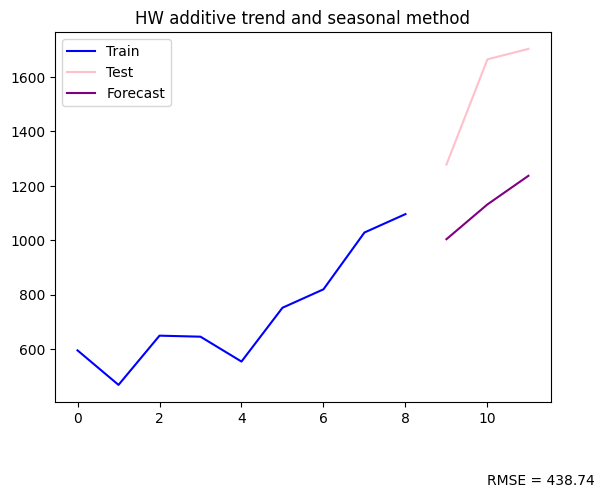

In [199]:
alpha = 0.24
beta = 0.21
gamma=0.01
hw_add= ExponentialSmoothing(y_train, seasonal_periods=4, trend='add',seasonal='add')
fit1= hw_add.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)
#fit1= hw_add.fit()
fcast1 = fit1.forecast(len(y_test))

y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
error = round(sqrt(mean_squared_error(y_test,fcast1)),2)
plt.text(10,100,"RMSE = "+str(error))
plt.title("HW additive trend and seasonal method")
plt.legend(loc = 'best')
plt.show()

In [179]:
### HW Multiplicative

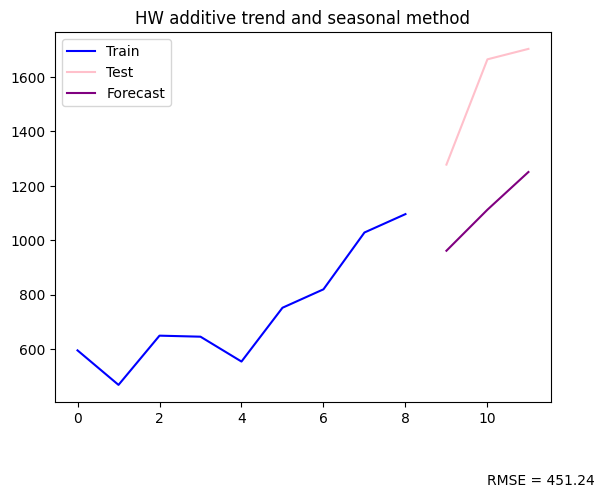

In [197]:
alpha = 0.12
beta = 0.15
gamma=0.12
hw_add= ExponentialSmoothing(y_train, seasonal_periods=4, trend='add',seasonal='mul')
fit1= hw_add.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma)
#fit1= hw_add.fit()
fcast1 = fit1.forecast(len(y_test))

y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
error = round(sqrt(mean_squared_error(y_test,fcast1)),2)
plt.text(10,100,"RMSE = "+str(error))
plt.title("HW additive trend and seasonal method")
plt.legend(loc = 'best')
plt.show()

In [18]:
##### HW additive with damped

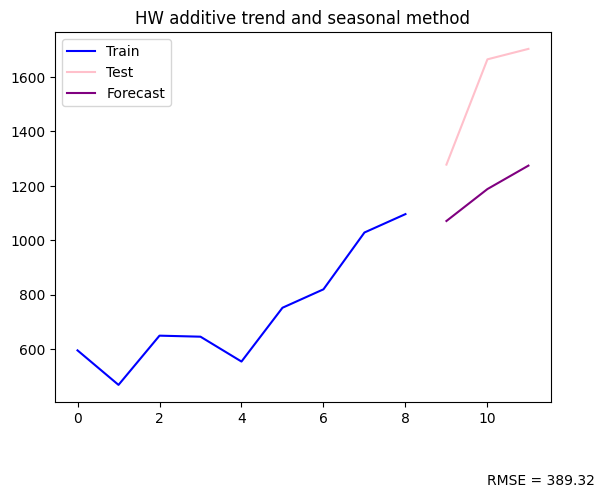

In [173]:
alpha = 0.1
beta = 0.98
gamma=0.3
phi=0.99
hw_add= ExponentialSmoothing(y_train, seasonal_periods=4, trend='add',seasonal='add',damped_trend=True)
#fit1= hw_add.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma,damping_trend=phi)
fit1= hw_add.fit()
fcast1 = fit1.forecast(len(y_test))

y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
error = round(sqrt(mean_squared_error(y_test,fcast1)),2)
plt.text(10,100,"RMSE = "+str(error))
plt.title("HW additive trend and seasonal method")
plt.legend(loc = 'best')
plt.show()

In [20]:
##### HW multiplicative with damped

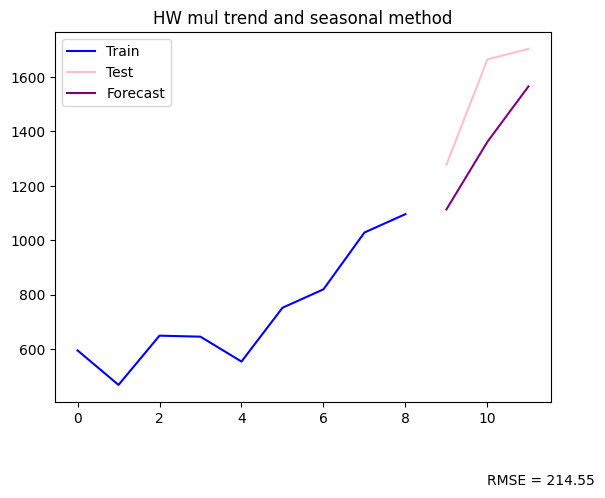

In [200]:
alpha = 0.0988
beta = 0.99
gamma=0.34
phi=0.99
hw_add= ExponentialSmoothing(y_train, seasonal_periods=4, trend='add',seasonal='mul',damped_trend=True)
#fit1= hw_add.fit(smoothing_level=alpha,smoothing_trend=beta,smoothing_seasonal=gamma,damping_trend=phi)
fit1= hw_add.fit()
fcast1 = fit1.forecast(len(y_test))

y_train.plot(color='blue',label='Train')
y_test.plot(color='pink',label='Test')
fcast1.plot(color='purple',label='Forecast')
error = round(sqrt(mean_squared_error(y_test,fcast1)),2)
plt.text(10,100,"RMSE = "+str(error))
plt.title("HW mul trend and seasonal method")
plt.legend(loc = 'best')
plt.show()